In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sms = pd.read_csv("C:/Users/jnave/OneDrive/Documents/Datasets/spam.csv",encoding = 'latin-1')

In [3]:
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
sms.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
2035,ham,Simply sitting and watching match in office..,NaN,NaN,NaN
4947,spam,"Hi this is Amy, we will be sending you a free ...",NaN,NaN,NaN
512,ham,Lol ok your forgiven :),NaN,NaN,NaN
1403,ham,cool. We will have fun practicing making babies!,NaN,NaN,NaN


## Data Cleaning

In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
sms.rename({'v1':'Target','v2':'Text'},axis=1,inplace=True)

In [9]:
sms

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
sms['Target'] = encoder.fit_transform(sms['Target'])

In [13]:
#missing values
sms.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
#check the duplicate values
sms.duplicated().sum()

403

In [15]:
sms.drop_duplicates(keep='first',inplace=True)

In [16]:
#now check the duplicate values
sms.duplicated().sum()

0

## EDA

In [122]:
sms

,Target,Text,characters,num_words,num_sentence,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [135]:
sms['Target'].unique()

array([0, 1])

<Axes: xlabel='Target', ylabel='count'>

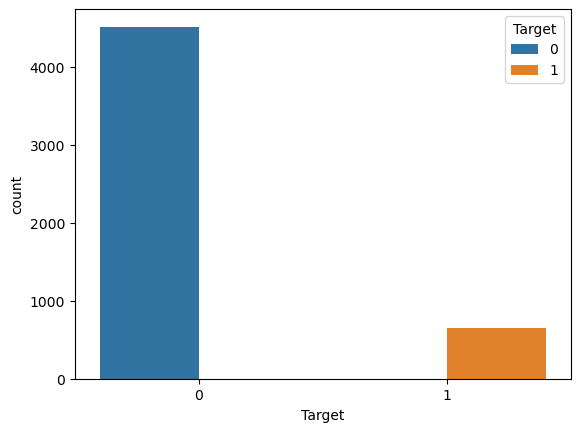

In [139]:
sns.countplot(data = sms,x = sms['Target'],hue='Target')

In [140]:
sms['characters'] = sms['Text'].apply(len)

In [141]:
import nltk

In [142]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jnave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
#num of words
sms['num_words']= sms['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [144]:
sms['num_sentence'] = sms['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [145]:

sms

,Target,Text,characters,num_words,num_sentence,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [61]:
sms[['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
#ham
sms[sms['Target']==0][['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
#spam
sms[sms['Target'] == 1][['characters','num_words','num_sentence']].describe()

,characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

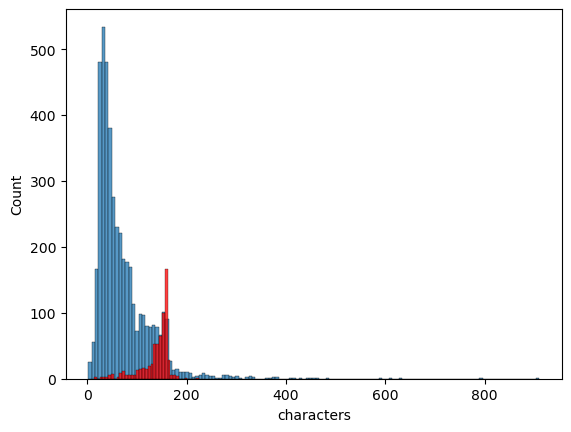

In [64]:
sns.histplot(sms[sms['Target'] == 0]['characters'])
sns.histplot(sms[sms['Target'] == 1]['characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

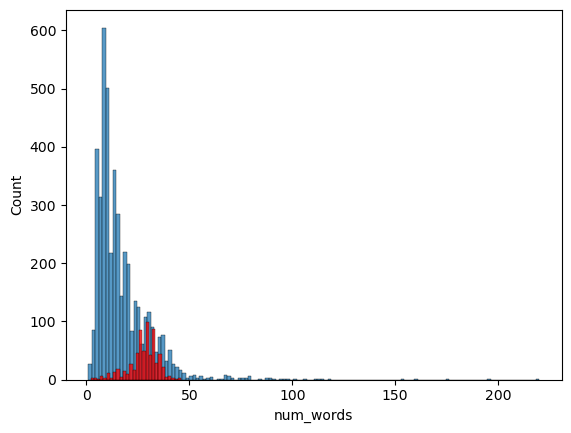

In [65]:
sns.histplot(sms[sms['Target'] == 0]['num_words'])
sns.histplot(sms[sms['Target'] == 1]['num_words'],color='red')

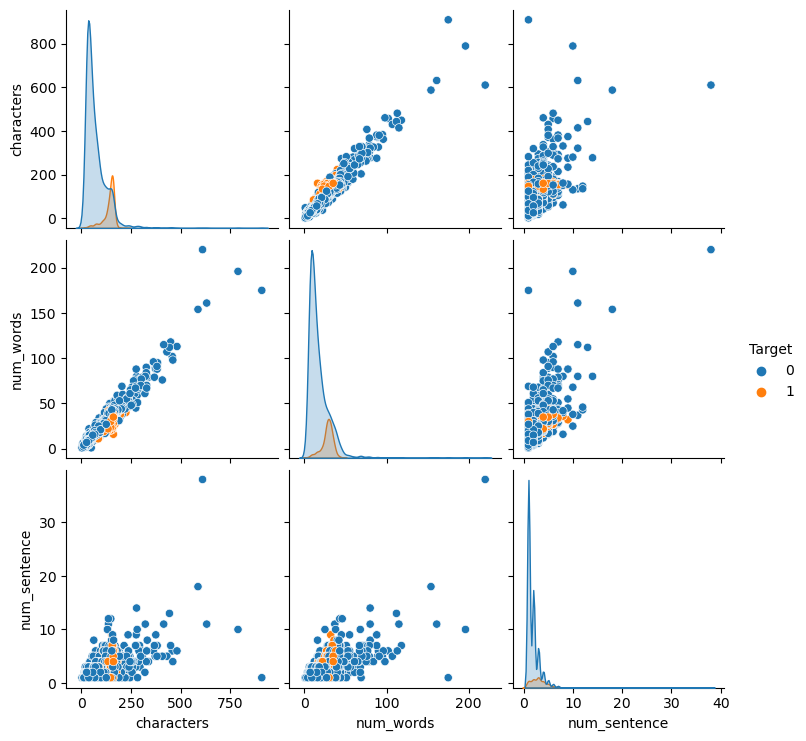

In [66]:
sns.pairplot(sms,hue='Target')

C:\Users\jnave\AppData\Local\Temp\ipykernel_1876\2372613765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sms.corr(),annot=True)


<Axes: >

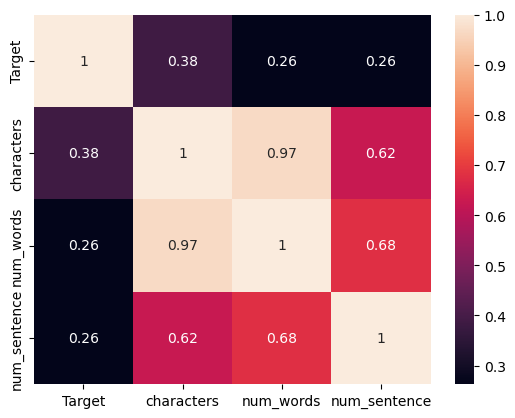

In [67]:
sns.heatmap(sms.corr(),annot=True)

## 3.Data Preprocessing

1.lowercase 2. word tokenization 3. remove stop words and punctuations 4. stemming

In [68]:
import string,nltk
from nltk.corpus import stopwords

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jnave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [71]:
def transform_text(text):
    #lowercase
    text = text.lower()
    #word tokenize
    text = nltk.word_tokenize(text)
    #remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #stop punctuation
    text = list(y)
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    #stemming
    text = list(y)
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)
        

In [72]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin learn'

In [73]:
sms['tranform_text'] = sms['Text'].apply(transform_text)

In [74]:
sms

,Target,Text,characters,num_words,num_sentence,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [75]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [76]:
from wordcloud import WordCloud

In [77]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [78]:
spam_wc = wc.generate(sms[sms['Target'] == 1]['tranform_text'].str.cat(sep=" "))

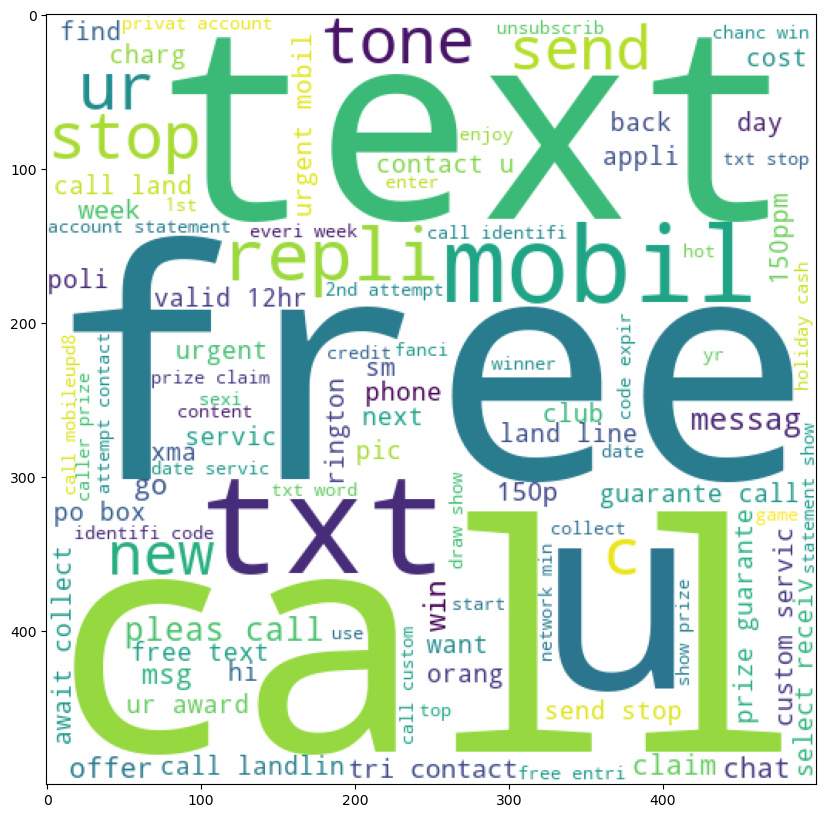

In [79]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

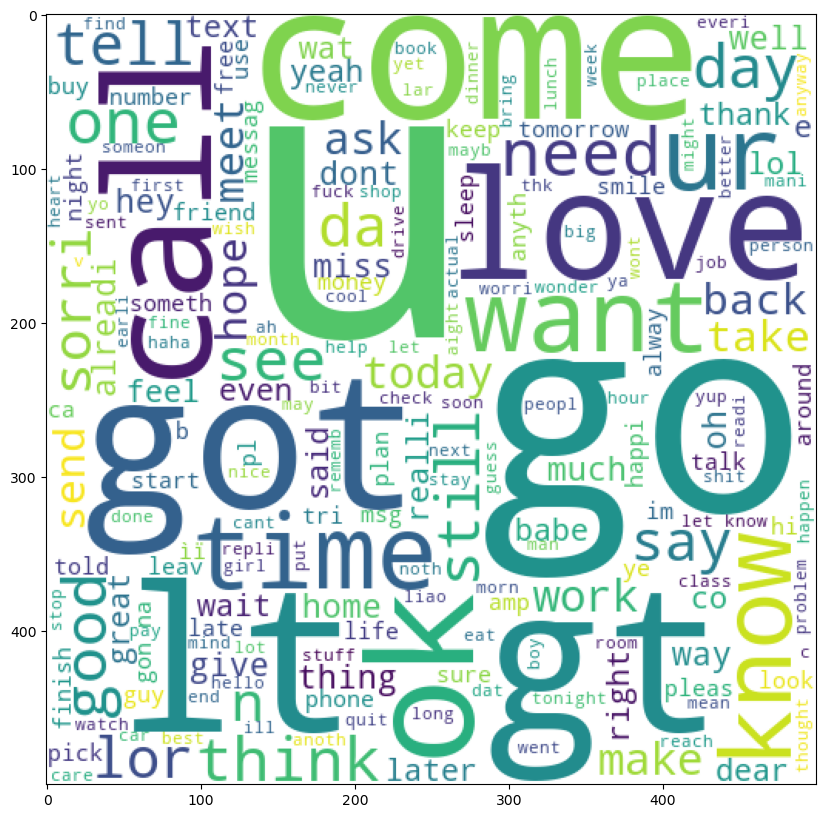

In [80]:
ham_wc = wc.generate(sms[sms['Target'] == 0]['tranform_text'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [81]:
spam_corpus = []
for msg in sms[sms['Target'] == 1]['tranform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [146]:
len(spam_corpus)

9939

In [147]:
from collections import Counter

In [151]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [ ]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [149]:
ham_corpus= []
for msg in sms[sms['Target'] == 0]['tranform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [150]:
len(ham_corpus)

35404

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [86]:
X = cv.fit_transform(sms['tranform_text']).toarray()

In [87]:
X.shape

(5169, 6708)

In [88]:
y = sms['Target'].values

In [89]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [92]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [94]:
b = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [95]:

mnb.fit(X_train,y_train)

MultinomialNB()

In [96]:
gnb.fit(X_train,y_train)

GaussianNB()

In [97]:
b.fit(X_train,y_train)


BernoulliNB()

In [98]:
y_pred = b.predict(X_test)

In [99]:
y_pred1 = mnb.predict(X_test)

In [100]:
y_pred2 = gnb.predict(X_test)

## BernoulliNB

In [101]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


## MultiNomialNB

In [102]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


## GaussianNB

In [103]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


## RandomForest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier()

In [106]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
y_pred3 = rfc.predict(X_test)

In [108]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9642166344294004
[[889   0]
 [ 37 108]]
1.0


In [109]:
from sklearn.linear_model import LogisticRegression

## LogisticRegression

In [110]:
lr = LogisticRegression()

In [111]:
lr.fit(X_train,y_train)

LogisticRegression()

In [112]:
y_pred4 = lr.predict(X_test)

In [113]:
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9777562862669246
[[886   3]
 [ 20 125]]
0.9765625


In [114]:
import pickle

In [115]:
with open("C:\\Users\\jnave\\OneDrive\\Documents\\Machine Learning\\smsmodel.txt","wb") as f:
    pickle.dump(rfc,f)

In [152]:
pip install nltk

In [154]:
with open("C:\\Users\\jnave\\OneDrive\\Documents\\Machine Learning\\countvectorsms.txt","wb") as f:
    pickle.dump(cv,f)

In [1]:
pip install nbconvert

In [2]:
pip install Pyppeteer

     ---------------------------------------- 0.0/83.4 kB ? eta -:--:--
     -------------- ------------------------- 30.7/83.4 kB 1.3 MB/s eta 0:00:01
     -------------- ------------------------- 30.7/83.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  81.9/83.4 kB 657.6 kB/s eta 0:00:01
     -------------------------------------- 83.4/83.4 kB 585.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/101.4 kB ? eta -:--:--
     ----------- ------------------------- 30.7/101.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 101.4/101.4 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
